<p>
Homework: https://work.caltech.edu/homework/hw2.pdf
<p>
Answers:
1. b
2. d
3. d --> e
4. b
5. c
6. c
7. a
8. d
9. a
10. b

<p>
Answer key: https://work.caltech.edu/homework/hw2_sol.pdf

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display
from numpy.linalg import inv

In [23]:
class Coin:
    def __init__(self):
        self.flips = np.array([])
    def flip(self, number_of_flips=1):
        self.flips = np.random.randint(0, 2, number_of_flips)
        return self.flips
    def frequency_of_heads(self):
        return self.flips.sum()
    def fraction_of_heads(self):
        return self.flips.mean()

In [24]:
coins = [Coin() for i in range(1000)]
len(coins)

1000

In [41]:
def experiment(coins, number_of_flips=10):
    for coin in coins:
        coin.flip(number_of_flips)
    frequencies = [coin.frequency_of_heads() for coin in coins]
    fractions = [coin.fraction_of_heads() for coin in coins]
    indices_of_interest = [0, 
                           np.random.randint(1000), 
                           frequencies.index(min(frequencies)), 
                           frequencies.index(max(frequencies))]
    return np.array([fractions[i] for i in indices_of_interest])

experiment(coins)

array([ 0.4,  0.8,  0. ,  1. ])

In [43]:
N = 100000

results = np.array([0.0, 0.0, 0.0, 0.0])
for n in range(N):
    results += experiment(coins)

results / N

array([ 0.500242,  0.499549,  0.03762 ,  0.962324])

<b>Answers 1 & 2:</b>
<p>
indices of interest: array([0, random_int, min_freq, max_freq])
<p>
average frequencies: array([ 0.500242,  0.499549,  0.03762 ,  0.962324])

In [131]:
class Line:
    '''A line that passes through the first two points of the given array'''
    def __init__(self, x1_s, x2_s, weights=None):
        if weights is not None:
            assert len(weights) == 3
            w0, w1, w2 = weights
            w0 /= w2
            w1 /= w2
            self.intercept = -w0
            self.slope = -w1
        else:
            assert len(x1_s) == 2
            assert len(x2_s) == 2
            self.slope = (x2_s[1]-x2_s[0])/(x1_s[1]-x1_s[0])
            self.intercept = x2_s[0] - self.slope * x1_s[0]
    
    def get_y(self, x):
        return self.intercept + self.slope * x
    
    def get_sign(self, x1, x2):
        return np.sign(- self.intercept - self.slope*x1 + x2 )
    
    def get_weights(self):
        return np.array([-self.intercept, -self.slope, 1])

In [132]:
x_min = -1
x_max = 1
y_min = x_min
y_max = x_max

[-0.30454300841603632, 0.98785007423487192]

[0.043975631058994491, -0.24914357928817843]

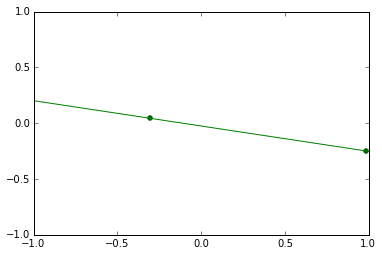

In [172]:
def select_target_function(plot = False):
    target_function_x = list(np.random.uniform(x_min, x_max, size=2))
    target_function_y = list(np.random.uniform(y_min, y_max, size=2))
    target_function = Line(target_function_x, target_function_y)
    if plot:
        plt.axis([x_min, x_max, y_min, y_max])
        plt.scatter(target_function_x, target_function_y, color='#006400')
        plt.plot([x_min, x_max], [target_function.get_y(x_min), target_function.get_y(x_max)], color='green')
    return target_function

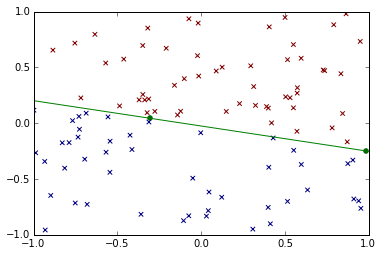

In [174]:
N = 100
sample_x1 = list(np.random.uniform(-1, 1, size=N))
sample_x2 = list(np.random.uniform(-1, 1, size=N))
sample_y = [target_function.get_sign(x1, x2) for x1, x2 in zip(sample_x1, sample_x2)]
plt.axis([x_min, x_max, y_min, y_max])
plt.scatter(target_function_x, target_function_y, color='#006400')
plt.plot([x_min, x_max], [target_function.get_y(x_min), target_function.get_y(x_max)], color='green')
plt.scatter(sample_x1, sample_x2, c=sample_y, marker='x')

In [175]:
X = np.array([np.ones(N), sample_x1, sample_x2]).transpose()
y = np.array(sample_y)
#X, y

In [176]:
X_transpose = X.transpose()
X_dagger = np.dot(inv(np.dot(X_transpose, X)), X_transpose)
w_lin_reg = np.dot(X_dagger, y)
print "Linear regression weights: {}".format(w_lin_reg)
predicted_function = Line(None, None, w_lin_reg)

Linear regression weights: [ 0.04392468  0.36981688  1.51752569]


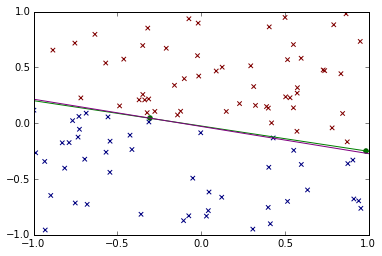

In [177]:
plt.axis([x_min, x_max, y_min, y_max])
plt.scatter(target_function_x, target_function_y, color='#006400')
plt.plot([x_min, x_max], [target_function.get_y(x_min), target_function.get_y(x_max)], color='green')
plt.plot([x_min, x_max], [predicted_function.get_y(x_min), predicted_function.get_y(x_max)], color='purple')
plt.scatter(sample_x1, sample_x2, c=sample_y, marker='x')

In [178]:
y_pred = np.array([predicted_function.get_sign(x1, x2) for x1, x2 in zip(sample_x1, sample_x2)])
results = y_pred != y
1.0 * results.sum()/len(results)

0.01

In [179]:
def sample_data_set(target_function, number_of_points=100):
    sample_x1 = list(np.random.uniform(-1, 1, size=number_of_points))
    sample_x2 = list(np.random.uniform(-1, 1, size=number_of_points))
    X = np.array([np.ones(number_of_points), sample_x1, sample_x2]).transpose()
    y = np.array([target_function.get_sign(x1, x2) for x1, x2 in zip(sample_x1, sample_x2)])
    return X, y

def linear_regression(X, y):
    X_dagger = np.dot(inv(np.dot(X.T, X)), X.T)
    weights = np.dot(X_dagger, y)
    return weights

In [137]:
predicted_functions = []
in_sample_errors = []

number_of_experiments = 1000
for i in range(number_of_experiments):
    X, y = sample_data_set(target_function, number_of_points=100)
    weights = linear_regression(X, y)
    predicted_function = Line(None, None, weights)
    predicted_functions.append(predicted_function)
    predictions = np.array([predicted_function.get_sign(x[1], x[2]) for x in X])
    misclassified = predictions != y
    in_sample_error = 1.0 * misclassified.sum()/len(misclassified)
    in_sample_errors.append(in_sample_error)

average_in_sample_error = np.array(in_sample_errors).mean()
print average_in_sample_error
print len(predicted_functions)

0.035
10


In [138]:
X_out, y_out = sample_data_set(target_function, number_of_points=1000)
out_of_sample_errors = []
for predicted_function in predicted_functions:
    predictions = np.array([predicted_function.get_sign(x[1], x[2]) for x in X_out])
    misclassified = predictions != y_out
    out_of_sample_error = 1.0 * misclassified.sum()/len(misclassified)
    out_of_sample_errors.append(out_of_sample_error)

average_out_of_sample_error = np.array(out_of_sample_errors).mean()
print average_out_of_sample_error  

0.0424


In [162]:
def PLA(X, y, initial_weights, max_iterations = 15000, verbose=False):
    w = initial_weights.copy()
    iter = 0
    while iter < max_iterations:
        if verbose:
            print "Iteration {} w {}".format(iter, w)
        predictions = np.sign(np.dot(X, w))
        misclassfied = predictions != y
        num_misclassified = np.sum(misclassfied)
        if num_misclassified == 0:
            break
        if verbose:
            print "Still misclassified: {}".format(num_misclassified)
        chosen = np.random.choice(np.where(misclassfied)[0])
        w += X[chosen] * y[chosen]
        iter += 1
    if verbose:
        print "Returning iter {}".format(iter)
        print
    return (iter+1 if iter < max_iterations else None, w)

In [164]:
number_of_experiments = 10000
iterations = 0
for i in range(number_of_experiments):
    X_pla, y_pla = sample_data_set(target_function, number_of_points=10)
    lin_reg_weights = linear_regression(X, y)
    i, _ = PLA(X_pla, y_pla, lin_reg_weights)
    if not i:
        print "Complain loudly"
        break
    iterations += i
iterations = iterations * 1.0 / number_of_experiments
print "PLA took {} iterations on average to converge".format(iterations)

PLA took 6.8718 iterations on average to converge


/Users/isha/miniconda/lib/python2.7/site-packages/ipykernel/__main__.py:13: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


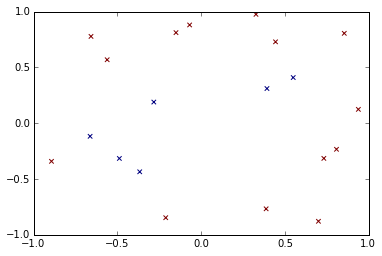

In [199]:
training_set_size = 20

# Generate X's
sample_x1 = list(np.random.uniform(-1, 1, size=training_set_size))
sample_x2 = list(np.random.uniform(-1, 1, size=training_set_size))
X = np.array([np.ones(len(sample_x1)), sample_x1, sample_x2]).transpose()

# Generate y's
sample_y = [np.sign(x[1] * x[1] + x[2] * x[2] - 0.6) for x in X]
y = np.array(sample_y)

# Flip signs of random 10% of points to introduce noise
random_index = np.random.choice(range(len(y)), size=np.round((1.0*len(y))/10), replace=False, p=None)
y[random_index] *= -1

# Plot points
plt.axis([x_min, x_max, y_min, y_max])
plt.scatter(sample_x1, sample_x2, c=sample_y, marker='x')

In [203]:
avg_in_sample_error = 0
number_of_experiments = 1000
for i in range(number_of_experiments):
    
    training_set_size = 1000
    
    # Generate X's
    sample_x1 = list(np.random.uniform(-1, 1, size=training_set_size))
    sample_x2 = list(np.random.uniform(-1, 1, size=training_set_size))
    X = np.array([np.ones(len(sample_x1)), sample_x1, sample_x2]).transpose()

    # Generate y's
    sample_y = [np.sign(x[1] * x[1] + x[2] * x[2] - 0.6) for x in X]
    y = np.array(sample_y)

    # Flip signs of random 10% of points to introduce noise
    random_index = np.random.choice(range(len(y)), size=np.round((1.0*len(y))/10), replace=False, p=None)
    y[random_index] *= -1

    # Plot points
    # plt.axis([x_min, x_max, y_min, y_max])
    # plt.scatter(sample_x1, sample_x2, c=sample_y, marker='x')

    weights = linear_regression(X, y)
    predicted_function = Line(None, None, weights)
    predictions = np.array([predicted_function.get_sign(x[1], x[2]) for x in X])
    misclassified = predictions != y
    avg_in_sample_error += 1.0 * misclassified.sum()/len(misclassified)

avg_in_sample_error /= number_of_experiments
print avg_in_sample_error

0.501636


/Users/isha/miniconda/lib/python2.7/site-packages/ipykernel/__main__.py:17: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [234]:
number_of_experiments = 100
weights_NLT_ALL = []
for i in range(number_of_experiments):
    
    verbose = number_of_experiments < 3
    
    training_set_size = 1000
    
    # Generate X's
    sample_x1 = list(np.random.uniform(-1, 1, size=training_set_size))
    sample_x2 = list(np.random.uniform(-1, 1, size=training_set_size))
    X = pd.DataFrame(np.array([np.ones(len(sample_x1)), sample_x1, sample_x2]).transpose())
    X.columns = ['x0', 'x1', 'x2']    
    if verbose:
        display(X.head())
        
    # Generate y's
    y = np.sign(X.x1**2 + X.x2**2 - 0.6)
    if verbose:
        display(y.head())

    # Flip signs of random 10% of points to introduce noise
    random_index = np.random.choice(range(len(y)), size=np.round((1.0*len(y))/10), replace=False, p=None)
    y[random_index] *= -1
    if verbose:
        print "{} of {}: {}".format(np.round((1.0*len(y))/10), len(y), random_index)

    if verbose:
        # Plot points
        plt.axis([x_min, x_max, y_min, y_max])
        plt.scatter(sample_x1, sample_x2, c=y.values, marker='x')
        plt.show()
    
    if verbose:
        weights = linear_regression(X, y)
        weights /= abs(weights[0])
        print "Linear regression weights: {}".format(weights)
    
    X_nlt = X.copy()
    X_nlt['x12'] = X.x1*X.x2
    X_nlt['x11'] = X.x1**2
    X_nlt['x22'] = X.x2**2
    if verbose:
        display(X_nlt.head())
    
    weights_nlt = linear_regression(X_nlt, y)
    weights_nlt /= abs(weights_nlt[0])
    if verbose:
        print "Linear regression weights (after non linear transformation): {}".format(weights_nlt)
    
    weights_NLT_ALL.append(weights_nlt)

weights_NLT_ALL_df = pd.DataFrame(weights_NLT_ALL)
display(weights_NLT_ALL_df.head())
display(weights_NLT_ALL_df.describe())


/Users/isha/miniconda/lib/python2.7/site-packages/ipykernel/__main__.py:23: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


,0,1,2,3,4,5
0,-1,0.009174,-0.037275,0.033677,1.472436,1.583772
1,-1,-0.031280,0.004341,-0.030062,1.385759,1.687319
2,-1,-0.034984,-0.056874,0.072083,1.662526,1.560251
3,-1,0.062975,0.061340,0.015582,1.558882,1.507562
4,-1,0.027430,-0.020894,-0.123512,1.444096,1.667487


,0,1,2,3,4,5
count,100,100.000000,100.000000,100.000000,100.000000,100.000000
mean,-1,0.002071,-0.004866,-0.010456,1.561519,1.583509
std,0,0.048548,0.048759,0.076659,0.069990,0.064961
min,-1,-0.137429,-0.116060,-0.161898,1.385759,1.440437
25%,-1,-0.033497,-0.036967,-0.063795,1.513904,1.535263
50%,-1,-0.000594,-0.012794,-0.022000,1.565490,1.582170
75%,-1,0.040690,0.032378,0.038802,1.602752,1.631263
max,-1,0.091839,0.100934,0.169238,1.737183,1.740607


In [250]:
avg_out_of_sample_error = 0

test_set_size = 1000
# Generate X's
sample_x1 = list(np.random.uniform(-1, 1, size=test_set_size))
sample_x2 = list(np.random.uniform(-1, 1, size=test_set_size))
X = pd.DataFrame(np.array([np.ones(len(sample_x1)), sample_x1, sample_x2]).transpose())
X.columns = ['x0', 'x1', 'x2']    
X['x12'] = X.x1*X.x2
X['x11'] = X.x1**2
X['x22'] = X.x2**2
# Generate y's
y = np.sign(X.x1**2 + X.x2**2 - 0.6)
# Flip signs of random 10% of points to introduce noise
random_index = np.random.choice(range(len(y)), size=np.round((1.0*len(y))/10), replace=False, p=None)
y[random_index] *= -1

for w in weights_NLT_ALL:
    predictions = np.sign(X.dot(w))
    misclassified = predictions != y
    avg_out_of_sample_error += 1.0 * misclassified.sum()/len(misclassified)

print avg_out_of_sample_error, len(weights_NLT_ALL)
avg_out_of_sample_error /= len(weights_NLT_ALL)
print avg_out_of_sample_error

12.952 100
0.12952


/Users/isha/miniconda/lib/python2.7/site-packages/ipykernel/__main__.py:15: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
